In [3]:
import sys
import os
possible_paths = [
        '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/lunjizhu/Desktop/MATH 285J Project Workspace/spectral_clustering_finance/data',
        'F:/spectral_clustering_finance/data/drive-download-20250531T145738Z-1-001/CRSP Data Set',
        '/Users/yifangu/Desktop/MATH 285J/285J Project/spectral_clustering_finance/data'
    ]

path = None
for p in possible_paths:
    if os.path.isdir(p):
        path = p
        print(f"Using data path: {path}")
        break

if path is None:
    print("Error: No valid data path found.")
    sys.exit(1)

Using data path: /Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set


In [4]:
from utils.returns import *
from utils.trader import execute_trading_strategy
from utils.helper import *
import time
import matplotlib.pyplot as plt

In [5]:
eligible_dates_txt_output = path + '/eligible_dates.txt'
eligible_dates = get_eligible_date_paths_from_file(eligible_dates_txt_output)

Successfully read 5269 paths from /Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/eligible_dates.txt


In [6]:
print(f"Eligible dates loaded: {eligible_dates}")

Eligible dates loaded: ['/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000103.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000316.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000331.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20000414.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2000/20001218.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2001/20010102.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2001/20010103.csv.gz', '/Users/khang/Desktop/math285j_project/data/drive-download-20250531T145738Z-1-001/CRSP Data Set/2001/20010104.csv.gz', '/Users/khang/Desktop/ma

In [11]:
import pandas as pd
import os

results_path = path
for _ in range(3):
    results_path = os.path.dirname(results_path)
result_df = pd.read_csv(os.path.join(results_path, 'results', 'result.csv'))

In [12]:
result_df = result_df.iloc[:, 12:]
result_df

,2001-04-16 00:00:00,2001-04-17 00:00:00,2001-04-18 00:00:00,2001-04-19 00:00:00,2001-04-20 00:00:00,2001-04-23 00:00:00,2001-04-24 00:00:00,2001-04-25 00:00:00,2001-04-26 00:00:00,2001-04-27 00:00:00,...,2021-12-15 00:00:00,2021-12-16 00:00:00,2021-12-17 00:00:00,2021-12-20 00:00:00,2021-12-21 00:00:00,2021-12-22 00:00:00,2021-12-23 00:00:00,2021-12-27 00:00:00,2021-12-28 00:00:00,2021-12-29 00:00:00
0,0.001203,-0.003351,-0.013745,0.001971,0.001325,0.008868,-0.001039,-0.004931,0.004850,0.004464,...,-0.000703,-0.000453,0.003099,-0.002827,0.006989,-0.001370,0.002920,-0.000558,-0.001341,0.000725
1,0.000359,0.000163,-0.001706,-0.000288,0.000626,0.001572,-0.000072,-0.003080,0.000402,0.000625,...,-0.000791,-0.000159,0.001897,-0.002909,0.005793,-0.000034,0.001862,0.000535,-0.000733,0.000204
2,-0.000103,0.000232,-0.001133,0.000929,0.000618,0.003024,0.000285,-0.003024,-0.000164,-0.001432,...,-0.001535,0.000212,0.001842,-0.003082,0.005677,-0.000161,0.001256,0.000973,-0.001148,-0.000813
3,0.001752,-0.002389,-0.010409,-0.000550,-0.000224,0.002308,0.000036,-0.002907,0.000725,-0.000040,...,-0.000884,0.000796,0.002251,-0.003192,0.005172,-0.000661,0.001643,-0.001226,0.000752,0.000445
4,-0.000254,-0.000067,-0.001456,-0.000711,-0.000348,0.000849,0.000487,-0.002739,-0.000170,-0.001492,...,-0.002428,0.002158,0.002236,-0.004017,0.006374,-0.000160,0.001854,0.000791,-0.001601,-0.000875
5,0.000471,0.000224,-0.001874,0.000107,0.000252,0.000715,-0.000746,-0.003084,0.000389,0.001004,...,-0.000578,0.000165,0.002463,-0.003248,0.005845,-0.000004,0.001504,0.000571,-0.000945,-0.000229


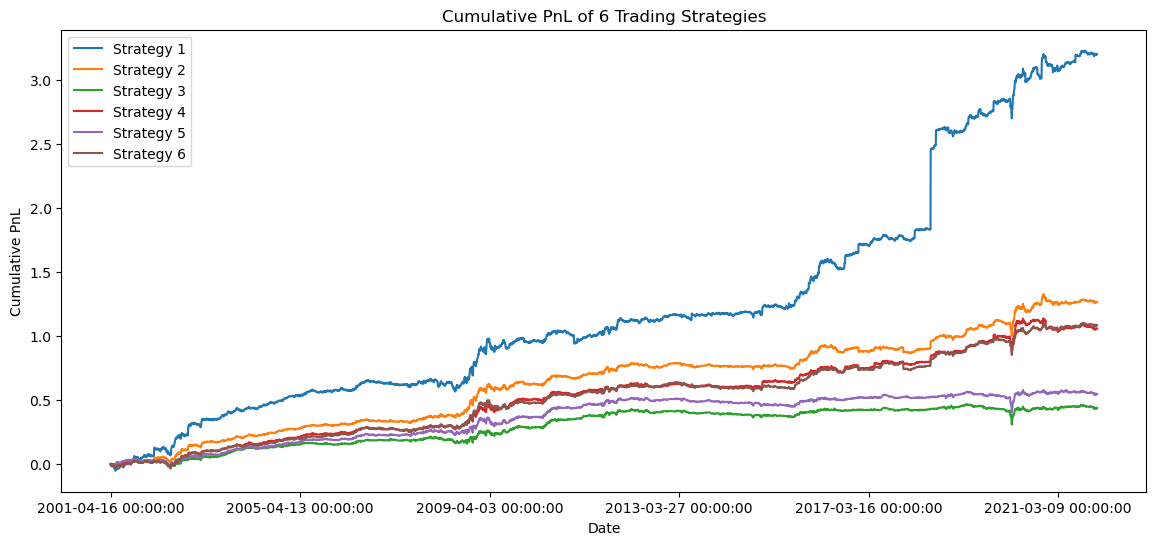

In [ ]:
cumulative_pnl = result_df.cumsum(axis=1).T
cumulative_pnl.plot(figsize=(14, 6))
plt.xlabel('Date')
plt.ylabel('Cumulative PnL')
plt.title('Cumulative PnL of the Trading Strategies')
plt.legend([f'Strategy {i+1}' for i in range(result_df.shape[0])])
plt.show()